# Kickstarter Data Analysis
## Victor Manuel Ibarra Encinas

------

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import dfply
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
#import dc_stat_think as dcst
#from mlxtend.preprocessing import minmax_scaling
%matplotlib inline

# Dataset

In [3]:
df = pd.read_csv(r'C:\Users\USER\Documents\Maestria\Programacion101\Kickstarter\ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
#df

In [4]:
df.shape

(378661, 15)

In [5]:
len(df)

378661

## Exploración de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
missing_values_count = df.isnull().sum()
missing_values_count

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [11]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [12]:
df >> dfply.filter_by((df.backers <= 0))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.0,failed,0,CA,0.0,0.0,2406.39
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.0,failed,0,US,0.0,0.0,5000.00
13,1000056157,G-Spot Place for Gamers to connect with eachot...,Games,Games,USD,2016-03-25,200000.0,2016-02-09 23:01:12,0.0,failed,0,US,0.0,0.0,200000.00
26,1000103948,Superhero Teddy Bear,DIY,Crafts,GBP,2016-01-05,12000.0,2015-12-06 20:09:06,0.0,failed,0,GB,0.0,0.0,17489.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378632,99984851,"""Loreto""",Comedy,Film & Video,USD,2014-06-05,12000.0,2014-05-06 23:50:34,0.0,failed,0,US,0.0,0.0,12000.00
378641,99991751,Here is the oasis for the youngest in the world.,Product Design,Design,CHF,2015-09-04,80000.0,2015-07-06 18:00:47,0.0,failed,0,CH,0.0,0.0,82207.27
378643,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.0,canceled,0,US,0.0,0.0,6500.00
378650,99996661,Date Seat - Boston iOS App,Apps,Technology,USD,2016-09-05,6000.0,2016-07-29 15:36:29,0.0,failed,0,US,0.0,0.0,6000.00


In [13]:
df >> dfply.filter_by((df.backers <= 0) & df.state == 'successful')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


### La columna "usd pledged" tiene 3796 como valores nulos, que representan el 1%, serán descartados para el presente análisis

In [14]:
(3797/len(df))*100

1.0027438790897398

### La columna "usd pledged" tiene 52,527 con valores = 0 usd los cuales serán descartados.

In [15]:
df['pledged'].value_counts()

0.00         52527
1.00          9195
10.00         5034
25.00         3994
50.00         3626
             ...  
303.57           1
189983.12        1
7211.70          1
5305.69          1
3026.75          1
Name: pledged, Length: 62130, dtype: int64

In [16]:
df['goal'].value_counts()

5000.0     29779
10000.0    26029
1000.0     16950
3000.0     15743
2000.0     15257
           ...  
2981.0         1
728.0          1
9064.0         1
18350.0        1
15780.0        1
Name: goal, Length: 8353, dtype: int64

In [17]:
df['backers'].value_counts()

0        55609
1        34869
2        23196
3        16063
4        12068
         ...  
2691         1
3712         1
3456         1
74405        1
2047         1
Name: backers, Length: 3963, dtype: int64

In [18]:
df['usd pledged'].value_counts()

0.00        68112
1.00         5341
25.00        3877
10.00        3624
50.00        3141
            ...  
10315.88        1
1615.79         1
13251.25        1
165.94          1
2205.64         1
Name: usd pledged, Length: 95455, dtype: int64

In [19]:
df['usd_pledged_real'].value_counts()

0.00         52527
1.00          6678
10.00         3633
25.00         3455
50.00         2937
             ...  
103748.00        1
286892.62        1
27235.69         1
10756.22         1
3575.02          1
Name: usd_pledged_real, Length: 106065, dtype: int64

In [20]:
df['usd_goal_real'].value_counts()

5000.00      24173
10000.00     20786
1000.00      13029
3000.00      12699
2000.00      11915
             ...  
6561.57          1
12346.25         1
2392.95          1
1757.91          1
781250.00        1
Name: usd_goal_real, Length: 50339, dtype: int64

In [21]:
df['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [22]:
df['category'].dtype

dtype('O')

### State labels

In [23]:
Main_State = df['state'].value_counts()
Main_State

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [24]:
Main_State.sum(axis = 0, skipna = True)

378661

In [25]:
Main_State_df = pd.DataFrame(Main_State)
Main_State_df['avg']= Main_State_df['state']*100/378661
Main_State_df.columns=['Tcount','Total pctg']
Main_State_df

,Tcount,Total pctg
failed,197719,52.215306
successful,133956,35.376234
canceled,38779,10.241086
undefined,3562,0.940683
live,2799,0.739184
suspended,1846,0.487507


Text(0.5, 0, 'Campaigns')

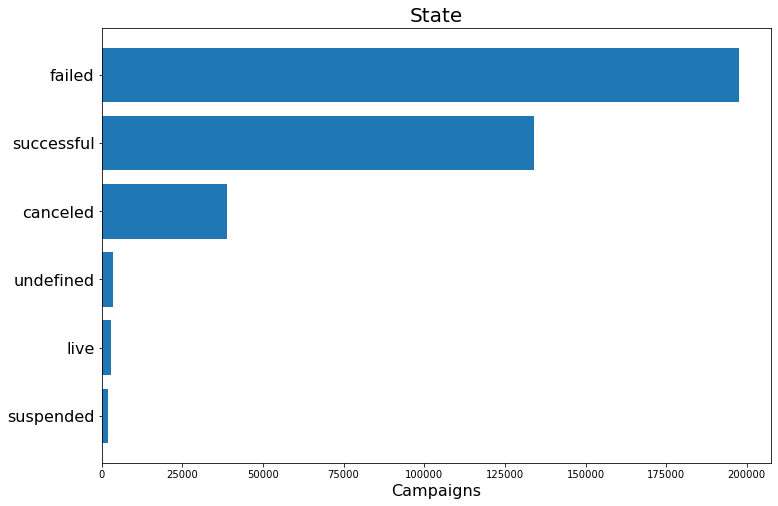

In [26]:
x = Main_State.index.tolist()
y = Main_State

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('State', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

### Main Categories: Most popular

In [27]:
Main_Categories = df['main_category'].value_counts()
Main_Categories

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Text(0.5, 0, 'Campaigns')

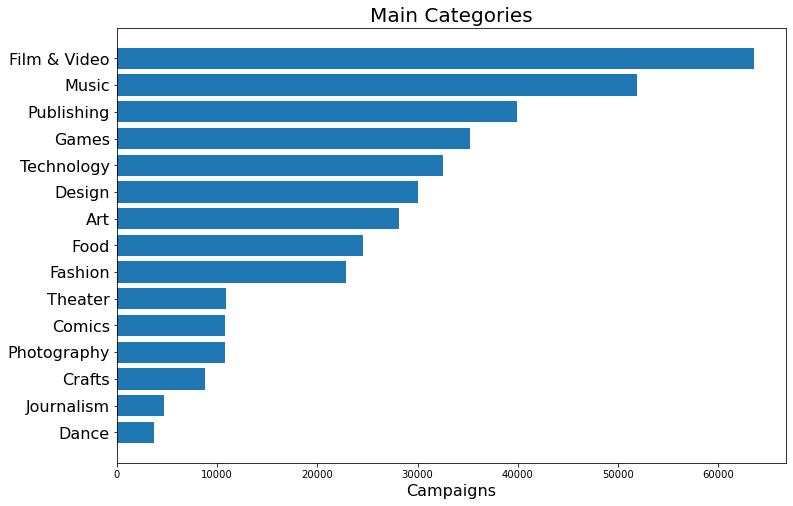

In [28]:
x = Main_Categories.index.tolist()
y = Main_Categories

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Main Categories', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

### Most successful categories:
### Categories with status = success

In [29]:
Cat_Exito = df.loc[df.state=='successful','main_category'].value_counts()
Cat_Exito

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

Text(0.5, 0, 'Campaigns')

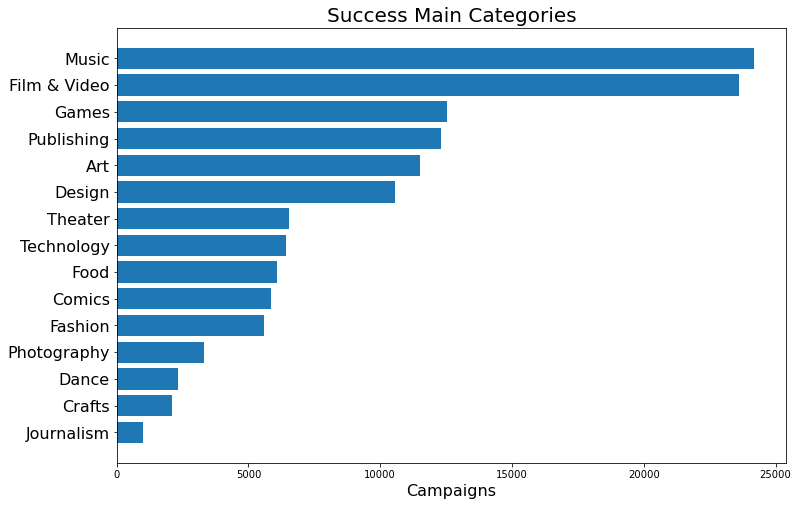

In [30]:
x = Cat_Exito.index.tolist()
y = Cat_Exito

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Success Main Categories', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

### Most failed categories

In [31]:
Cat_Failed = df.loc[df.state=='failed','main_category'].value_counts()
Cat_Failed

Film & Video    32904
Publishing      23145
Music           21752
Technology      20616
Games           16003
Food            15969
Design          14814
Fashion         14182
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3137
Dance            1235
Name: main_category, dtype: int64

Text(0.5, 0, 'Campaigns')

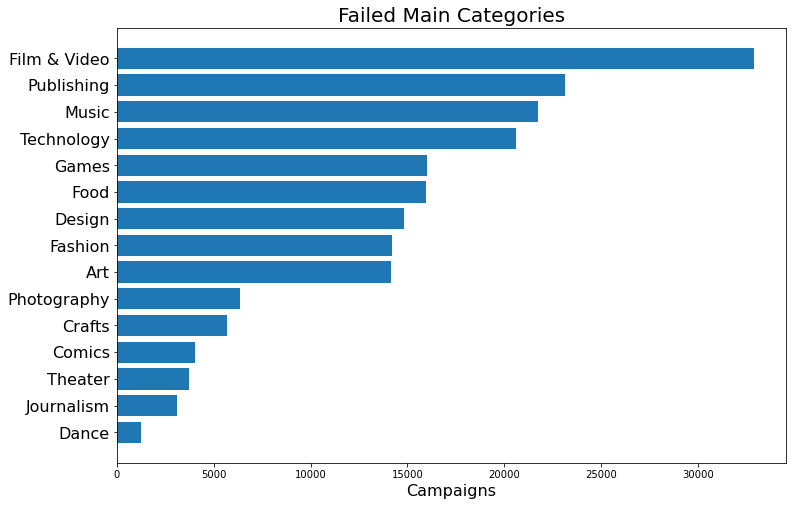

In [32]:
x = Cat_Failed.index.tolist()
y = Cat_Failed

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main Categories', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

In [33]:
Cat_Canceled = df.loc[df.state=='canceled','main_category'].value_counts()
Cat_Canceled

Games           6202
Film & Video    5755
Technology      4715
Design          4152
Publishing      3602
Music           3305
Fashion         2650
Art             2222
Food            2211
Photography      986
Crafts           843
Comics           842
Theater          608
Journalism       523
Dance            163
Name: main_category, dtype: int64

Text(0.5, 0, 'Campaigns')

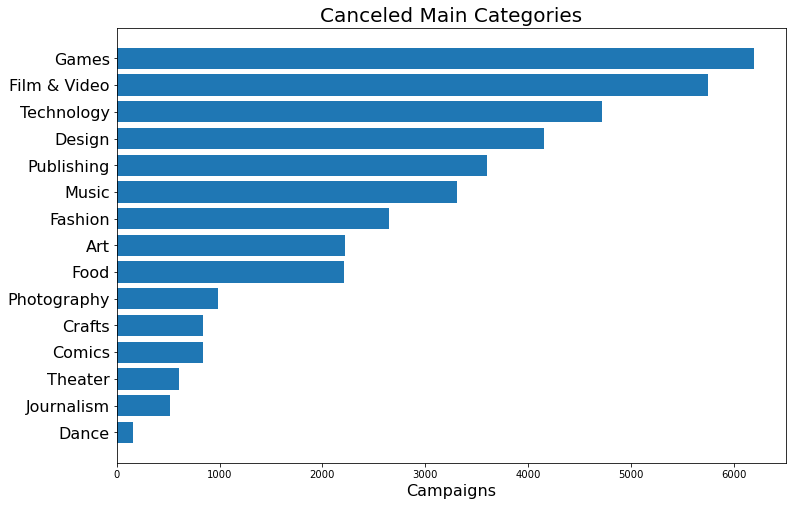

In [34]:
x = Cat_Canceled.index.tolist()
y = Cat_Canceled

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Canceled Main Categories', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

### Date Parse

In [35]:
df['deadline'].dtype

dtype('O')

In [36]:
df['launched'].dtype

dtype('O')

In [37]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
print(df['deadline'].dtype, df['launched'])

datetime64[ns] 0        2015-08-11 12:12:28
1        2017-09-02 04:43:57
2        2013-01-12 00:20:50
3        2012-03-17 03:24:11
4        2015-07-04 08:35:03
                 ...        
378656   2014-09-17 02:35:30
378657   2011-06-22 03:35:14
378658   2010-07-01 19:40:30
378659   2016-01-13 18:13:53
378660   2011-07-19 09:07:47
Name: launched, Length: 378661, dtype: datetime64[ns]


In [38]:
df['duration'] = df['deadline'] - df['launched']
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55 days 15:24:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,29 days 21:24:30
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,26 days 20:24:46
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,45 days 04:19:30
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,30 days 05:46:07


### Launched dates on 1970? 

In [39]:
df.sort_values('launched')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.00,0.00,700.00,14749 days 23:00:00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.00,0.00,1905.97,16738 days 23:00:00
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.00,0.00,5000.00,14866 days 23:00:00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.00,0.00,4000.00,14760 days 23:00:00
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.00,0.00,10000.00,14732 days 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95778,1486845240,Americas Got Talent - Serious MAK,Hip-Hop,Music,USD,2018-01-16,500.0,2018-01-02 14:13:09,0.0,live,0,US,0.00,0.00,500.00,13 days 09:46:51
373787,974738310,EVO Planner: The World's First Personalized Fl...,Product Design,Design,USD,2018-02-09,15000.0,2018-01-02 14:15:38,269.0,live,8,US,269.00,269.00,15000.00,37 days 09:44:22
217150,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,USD,2018-01-16,10000.0,2018-01-02 14:17:46,165.0,live,3,US,165.00,165.00,10000.00,13 days 09:42:14
163161,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,650.0,2018-01-02 14:38:17,7.0,live,1,US,7.00,7.00,650.00,29 days 09:21:43


In [40]:
df.drop(df.loc[df['launched']< "2008-01-01"].index, inplace=True)

In [41]:
df.sort_values('launched')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.00,625.00,1000.00,39 days 02:57:12
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.00,22.00,80000.00,87 days 23:52:07
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.00,35.00,20.00,8 days 02:07:57
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,145.0,successful,25,US,145.00,145.00,99.00,79 days 06:23:39
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,387.0,failed,10,US,387.00,387.00,1900.00,28 days 09:49:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95778,1486845240,Americas Got Talent - Serious MAK,Hip-Hop,Music,USD,2018-01-16,500.0,2018-01-02 14:13:09,0.0,live,0,US,0.00,0.00,500.00,13 days 09:46:51
373787,974738310,EVO Planner: The World's First Personalized Fl...,Product Design,Design,USD,2018-02-09,15000.0,2018-01-02 14:15:38,269.0,live,8,US,269.00,269.00,15000.00,37 days 09:44:22
217150,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,USD,2018-01-16,10000.0,2018-01-02 14:17:46,165.0,live,3,US,165.00,165.00,10000.00,13 days 09:42:14
163161,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,650.0,2018-01-02 14:38:17,7.0,live,1,US,7.00,7.00,650.00,29 days 09:21:43


In [42]:
df.duration.describe()

count                        378654
mean     33 days 15:18:16.321927112
std      12 days 19:16:25.822353455
min                 0 days 00:07:17
25%                29 days 02:20:36
50%         29 days 16:32:21.500000
75%                36 days 15:32:29
max                91 days 23:06:13
Name: duration, dtype: object

In [43]:
binsl = [pd.Timedelta ('0 days'),
         pd.Timedelta ('7 days'),
         pd.Timedelta ('22 days'),
         pd.Timedelta ('37 days'),
         pd.Timedelta ('52 days'),
         pd.Timedelta ('67 days'),
         pd.Timedelta ('82 days'),
         pd.Timedelta ('92 days'),]
names =  ['0-7','8-22','23-37','38-52','53-67','68-82','83-92']
df['duration'] = pd.cut(df['duration'], binsl, labels = names)

In [45]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,53-67
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,53-67
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,38-52
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,23-37
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,53-67


In [46]:
df['duration'].value_counts()

23-37    243408
38-52     48145
53-67     41779
8-22      38077
0-7        3308
83-92      2917
68-82      1020
Name: duration, dtype: int64

In [47]:
Time_cat = df['duration'].value_counts()
Time_cat

23-37    243408
38-52     48145
53-67     41779
8-22      38077
0-7        3308
83-92      2917
68-82      1020
Name: duration, dtype: int64

In [48]:
dfTime_cat = pd.DataFrame(data = Time_cat) 
dfTime_cat

,duration
23-37,243408
38-52,48145
53-67,41779
8-22,38077
0-7,3308
83-92,2917
68-82,1020


In [49]:
dfTime_cat.sum(axis = 0)

duration    378654
dtype: int64

In [50]:
### Prueba graficas
results = df.state.value_counts()
results

failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

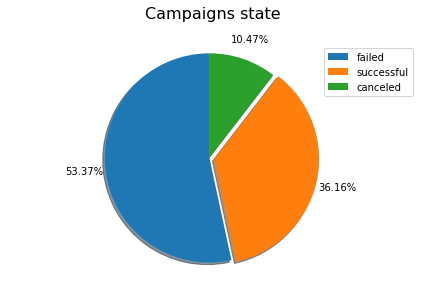

In [51]:
plt.pie(results[:3], autopct='%1.2f%%',pctdistance = 1.2, startangle = 90, explode = (0,0.05,0), shadow = True)
plt.legend(labels = results.index.tolist(), loc="best")
plt.axis('equal')
plt.title('Campaigns state', fontsize = 16, y=1.08)
plt.tight_layout()

In [52]:
qty = len(df['duration'])

In [53]:
dfTime_cat['pctg'] = (dfTime_cat['duration']/ qty) * 100
dfTime_cat

,duration,pctg
23-37,243408,64.282432
38-52,48145,12.714774
53-67,41779,11.033556
8-22,38077,10.055882
0-7,3308,0.873621
83-92,2917,0.770360
68-82,1020,0.269375


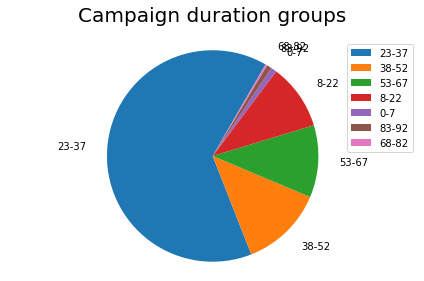

In [54]:
matplotlib.pyplot.pie(Time_cat, explode=None, labels=Time_cat.index.tolist(), colors=None, 
                     autopct=None, pctdistance=0.6, shadow=False, 
                     labeldistance=1.2, startangle=60, radius=1, 
                     counterclock=True, wedgeprops=None, textprops=None, 
                     frame=False, rotatelabels=False,
                     data=None)
plt.legend(labels = Time_cat.index.tolist(), loc="best")
plt.title('Campaign duration groups', fontsize = 20, y=1.05)
plt.axis('equal')
plt.tight_layout()

In [55]:
Main_State_df = pd.DataFrame(Main_State)
Main_State_df['pctg']= Main_State_df['state']*100/qty
Main_State_df.columns=['Tcampaigns','Tpctg']
Main_State_df

,Tcampaigns,Tpctg
failed,197719,52.216271
successful,133956,35.376888
canceled,38779,10.241276
undefined,3562,0.940700
live,2799,0.739197
suspended,1846,0.487516


--------

# 1. Does the campaign length impact the success rate?


Text(0.5, 0, 'Campaigns')

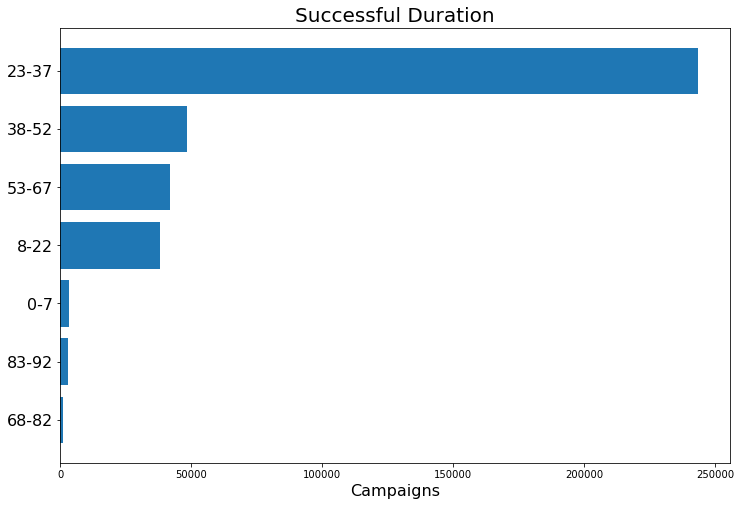

In [56]:
x = Time_cat.index.tolist()
y = Time_cat

plt.figure(figsize=(12, 8)) #make it bigger
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Successful Duration', fontsize = 20)
plt.xlabel('Campaigns', fontsize = 16)

In [57]:
df1f = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'failed'))
df1s = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'successful'))
df1c = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'canceled'))
df1u = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'undefined'))
df1l = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'live'))
df1sus = df >> dfply.filter_by((df.duration == '0-7') & (df.state == 'suspended'))

In [58]:
print(df1f.shape, df1s.shape, df1c.shape, df1u.shape, df1l.shape, df1sus.shape)

(1618, 16) (1389, 16) (229, 16) (25, 16) (5, 16) (42, 16)


In [59]:
df2f = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'failed'))
df2s = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'successful'))
df2c = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'canceled'))
df2u = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'undefined'))
df2l = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'live'))
df2sus = df >> dfply.filter_by((df.duration == '8-22') & (df.state == 'suspended'))
print(df2f.shape, df2s.shape, df2c.shape, df2u.shape, df2l.shape, df2sus.shape)

(16083, 16) (18559, 16) (2705, 16) (432, 16) (108, 16) (190, 16)


In [60]:
df3f = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'failed'))
df3s = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'successful'))
df3c = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'canceled'))
df3u = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'undefined'))
df3l = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'live'))
df3sus = df >> dfply.filter_by((df.duration == '23-37') & (df.state == 'suspended'))
print(df3f.shape, df3s.shape, df3c.shape, df3u.shape, df3l.shape, df3sus.shape)

(126379, 16) (87784, 16) (24398, 16) (2358, 16) (1449, 16) (1040, 16)


In [61]:
df4f = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'failed'))
df4s = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'successful'))
df4c = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'canceled'))
df4u = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'undefined'))
df4l = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'live'))
df4sus = df >> dfply.filter_by((df.duration == '38-52') & (df.state == 'suspended'))
print(df4f.shape, df4s.shape, df4c.shape, df4u.shape, df4l.shape, df4sus.shape)

(25140, 16) (16296, 16) (5546, 16) (371, 16) (550, 16) (242, 16)


In [62]:
df5f = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'failed'))
df5s = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'successful'))
df5c = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'canceled'))
df5u = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'undefined'))
df5l = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'live'))
df5sus = df >> dfply.filter_by((df.duration == '53-67') & (df.state == 'suspended'))
print(df5f.shape, df5s.shape, df5c.shape, df5u.shape, df5l.shape, df5sus.shape)

(26319, 16) (8685, 16) (5390, 16) (375, 16) (687, 16) (323, 16)


In [63]:
df6f = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'failed'))
df6s = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'successful'))
df6c = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'canceled'))
df6u = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'undefined'))
df6l = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'live'))
df6sus = df >> dfply.filter_by((df.duration == '68-82') & (df.state == 'suspended'))
print(df6f.shape, df6s.shape, df6c.shape, df6u.shape, df6l.shape, df6sus.shape)

(499, 16) (404, 16) (117, 16) (0, 16) (0, 16) (0, 16)


In [64]:
df7f = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'failed'))
df7s = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'successful'))
df7c = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'canceled'))
df7u = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'undefined'))
df7l = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'live'))
df7sus = df >> dfply.filter_by((df.duration == '83-92') & (df.state == 'suspended'))
print(df7f.shape, df7s.shape, df7c.shape, df7u.shape, df7l.shape, df7sus.shape)

(1681, 16) (839, 16) (388, 16) (1, 16) (0, 16) (8, 16)


In [61]:
print(df1s.shape, df2s.shape, df3s.shape, df4s.shape, df5s.shape, df6s.shape, df7s.shape )

(1389, 16) (18559, 16) (87784, 16) (16296, 16) (8685, 16) (404, 16) (839, 16)


In [62]:
[len(df1s.index)],[len(df2s.index)],[len(df3s.index)],[len(df4s.index)],[len(df5s.index)],[len(df6s.index)],[len(df7s.index)]

([1389], [18559], [87784], [16296], [8685], [404], [839])

In [63]:
a1 = len(df1s.index),len(df2s.index),len(df3s.index),len(df4s.index),len(df5s.index),len(df6s.index),len(df7s.index)
a1

(1389, 18559, 87784, 16296, 8685, 404, 839)

In [64]:
a = ([len(df1s.index),len(df2s.index),len(df3s.index),len(df4s.index),len(df5s.index),len(df6s.index),len(df7s.index)])
a

[1389, 18559, 87784, 16296, 8685, 404, 839]

In [65]:
col = ('0-7','8-22','23-37','38-52','53-67','68-82','83-92')
col

('0-7', '8-22', '23-37', '38-52', '53-67', '68-82', '83-92')

### Successful campaigns vs Duration

#### There are much more successful campaigns on the range of 23-37 days, but there are much more campaigns in that same range. So, it is hard to make an statement with those different values.

In [65]:
Success = pd.DataFrame({"Duration":['0-7','8-22','23-37','38-52','53-67','68-82','83-92'],"Campaigns":[len(df1s.index),len(df2s.index),len(df3s.index),len(df4s.index),len(df5s.index),len(df6s.index),len(df7s.index)]})
Success

,Duration,Campaigns
0,0-7,1389
1,8-22,18559
2,23-37,87784
3,38-52,16296
4,53-67,8685
5,68-82,404
6,83-92,839


In [66]:
Success_1 = Success.set_index('Duration')
Success_1

,Campaigns
Duration,
0-7,1389
8-22,18559
23-37,87784
38-52,16296
53-67,8685
68-82,404
83-92,839


In [67]:
Success_1.rename(columns={"Campaigns":"SuccCamp"})
Success_1

,Campaigns
Duration,
0-7,1389
8-22,18559
23-37,87784
38-52,16296
53-67,8685
68-82,404
83-92,839


In [68]:
Success_1.columns

Index(['Campaigns'], dtype='object')

In [69]:
dfTime_cat

,duration,pctg
23-37,243408,64.282432
38-52,48145,12.714774
53-67,41779,11.033556
8-22,38077,10.055882
0-7,3308,0.873621
83-92,2917,0.770360
68-82,1020,0.269375


In [70]:
Success_1.columns

Index(['Campaigns'], dtype='object')

In [71]:
dfTime_cat.columns

Index(['duration', 'pctg'], dtype='object')

In [72]:
dfTime_cat.rename(columns={"duration":"TotalCampaigns"})

,TotalCampaigns,pctg
23-37,243408,64.282432
38-52,48145,12.714774
53-67,41779,11.033556
8-22,38077,10.055882
0-7,3308,0.873621
83-92,2917,0.770360
68-82,1020,0.269375


<AxesSubplot:xlabel='Duration'>

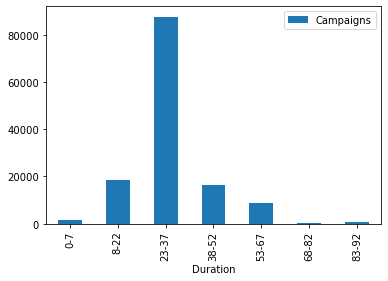

In [73]:
Success_1.plot(kind ='bar')

In [74]:
ds_ratio = dfTime_cat.join(Success_1)
ds_ratio

,duration,pctg,Campaigns
23-37,243408,64.282432,87784
38-52,48145,12.714774,16296
53-67,41779,11.033556,8685
8-22,38077,10.055882,18559
0-7,3308,0.873621,1389
83-92,2917,0.770360,839
68-82,1020,0.269375,404


In [75]:
ds_ratio.columns

Index(['duration', 'pctg', 'Campaigns'], dtype='object')

In [76]:
ds_ratio = ds_ratio.rename(columns={'duration':'TCampaigns','pctg':'Pctg','Campaigns':'SuccessCampaigns'})
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
ds_ratio.columns

Index(['TCampaigns', 'Pctg', 'SuccessCampaigns'], dtype='object')

In [77]:
ds_ratio

,TCampaigns,Pctg,SuccessCampaigns
23-37,243408,64.282432,87784
38-52,48145,12.714774,16296
53-67,41779,11.033556,8685
8-22,38077,10.055882,18559
0-7,3308,0.873621,1389
83-92,2917,0.770360,839
68-82,1020,0.269375,404


In [78]:
ds_ratio['SuccessRatio'] = ds_ratio['SuccessCampaigns']/ds_ratio['TCampaigns']
ds_ratio

,TCampaigns,Pctg,SuccessCampaigns,SuccessRatio
23-37,243408,64.282432,87784,0.360646
38-52,48145,12.714774,16296,0.338478
53-67,41779,11.033556,8685,0.207880
8-22,38077,10.055882,18559,0.487407
0-7,3308,0.873621,1389,0.419891
83-92,2917,0.770360,839,0.287624
68-82,1020,0.269375,404,0.396078


<AxesSubplot:ylabel='SuccessRatio'>

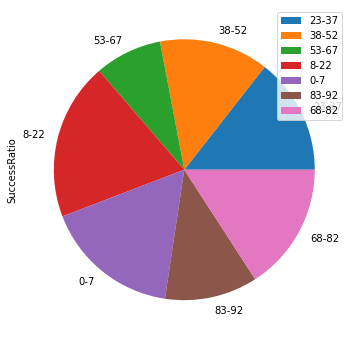

In [79]:
ds_ratio.plot.pie(y = 'SuccessRatio', figsize = (6,6))

In [80]:
ds_ratio.sum()

TCampaigns          378654.000000
Pctg                   100.000000
SuccessCampaigns    133956.000000
SuccessRatio             2.498004
dtype: float64

In [81]:
ds_ratio.columns

Index(['TCampaigns', 'Pctg', 'SuccessCampaigns', 'SuccessRatio'], dtype='object')

<AxesSubplot:>

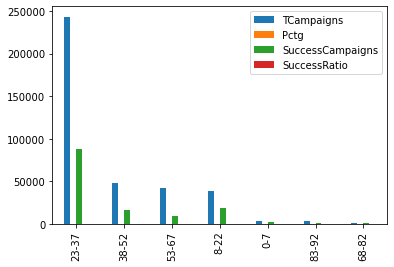

In [82]:
ds_ratio.plot(kind ='bar')

In [83]:
ds_ratio.index

Index(['23-37', '38-52', '53-67', '8-22', '0-7', '83-92', '68-82'], dtype='object')

In [84]:
ds_ratio.columns

Index(['TCampaigns', 'Pctg', 'SuccessCampaigns', 'SuccessRatio'], dtype='object')

<AxesSubplot:xlabel='index'>

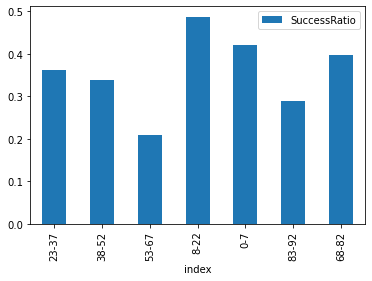

In [85]:
ds_ratio.reset_index().plot(x='index', y ='SuccessRatio', kind = 'bar')

______________

# 2. What is the relationship between the goal and the success of the campaign?


### Dataframe will be segmented on different ranges of goal

Group 1: x <= 1,000

In [87]:
df.head()
df1g = df >> dfply.filter_by((df.usd_goal_real <= 1000))
len(df1g)

60891

Group 2: 1,000 < x <= 10,000

In [88]:
df2g = df >> dfply.filter_by((df.usd_goal_real > 1000) & (df.usd_goal_real <=10000))
len(df2g)

193347

Group 3: 10,000 < x <= 100,000

In [89]:
df3g = df >> dfply.filter_by((df.usd_goal_real > 10000) & (df.usd_goal_real <=100000))
len(df3g)

111732

Group 4: 100,000 < x

In [90]:
df4g = df >> dfply.filter_by((df.usd_goal_real > 100000))
len(df4g)

12684

Comparing data size to confirm no data has been lost

In [91]:
p = len(df1g)+len(df2g)+len(df3g)+len(df4g)

In [92]:
qty == p

True

In [93]:
dfG = pd.DataFrame({"Group":['1','2','3','4'],"Campaigns":[len(df1g),len(df2g),len(df3g),len(df4g)]})
dfG

,Group,Campaigns
0,1,60891
1,2,193347
2,3,111732
3,4,12684


<AxesSubplot:>

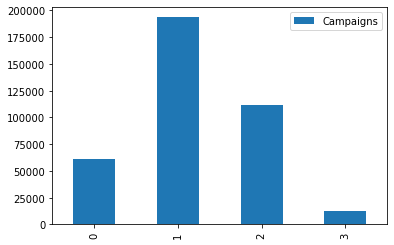

In [94]:
dfG.plot(kind = 'bar')

In [95]:
dfG1 = dfG.set_index('Group')
dfG1['TPctg']= 100*dfG1['Campaigns']/qty
dfG1

,Campaigns,TPctg
Group,,
1,60891,16.080908
2,193347,51.061655
3,111732,29.507677
4,12684,3.349760


<AxesSubplot:xlabel='Group'>

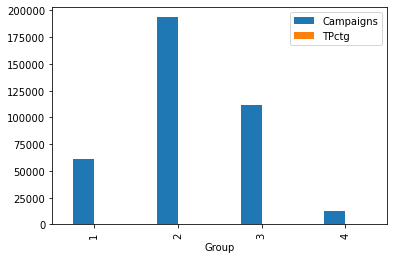

In [96]:
dfG1.plot(kind = 'bar')

In [97]:
df1g.describe().apply(lambda s: s.apply('{0:5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,60891.000000,60891.000000,60891.000000,60891.000000,60886.000000,60891.000000,60891.000000
mean,1079803640.528157,645.713580,929.898522,24.241760,677.604951,869.680786,576.129032
std,618681426.503156,1037.590131,4686.933047,101.999417,3361.005091,4233.761748,317.804146
min,21109.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,544011074.000000,300.000000,14.680000,1.000000,5.000000,15.000000,300.000000
50%,1082237073.000000,500.000000,220.000000,7.000000,128.000000,225.000000,501.940000
75%,1612851478.500000,999.000000,851.000000,22.000000,705.000000,865.150000,900.000000
max,2147448229.000000,100000.000000,365538.000000,7857.000000,365538.000000,365538.000000,1000.000000


In [98]:
df2g.describe().apply(lambda s: s.apply('{0:5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,193347.000000,193347.000000,193347.000000,193347.000000,189584.000000,193347.000000,193347.000000
mean,1072248735.796402,5498.738262,4174.706763,65.484869,3022.712842,3790.500025,4826.403717
std,619178827.722190,10505.405336,30418.181384,632.950708,24551.226094,27331.282603,2750.986998
min,39036.000000,600.000000,0.000000,0.000000,0.000000,0.000000,1000.100000
25%,534748460.500000,2500.000000,46.000000,2.000000,25.000000,45.660000,2500.000000
50%,1072966948.000000,4500.000000,858.000000,14.000000,481.235000,845.000000,4500.000000
75%,1607383528.500000,7000.000000,4026.000000,58.000000,3173.000000,4022.000000,6926.060000
max,2147472329.000000,1100000.000000,8782571.990000,219382.000000,8782571.990000,8782571.990000,10000.000000


In [99]:
df3g.describe().apply(lambda s: s.apply('{0:5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,111732.000000,111732.000000,111732.000000,111732.000000,111707.000000,111732.000000,111732.000000
mean,1077123984.133588,35536.085431,20239.032178,187.385521,14072.933841,18946.742274,32034.503341
std,619087203.826957,68864.074260,125501.491135,1001.828266,92500.834408,118965.482680,22158.688647
min,5971.000000,5947.000000,0.000000,0.000000,0.000000,0.000000,10001.000000
25%,540962728.500000,15000.000000,45.000000,2.000000,24.000000,45.000000,15000.000000
50%,1077944841.000000,25000.000000,1203.000000,15.000000,725.000000,1202.100000,25000.000000
75%,1613607751.500000,43000.000000,14316.000000,116.000000,9303.055000,14398.912500,40000.000000
max,2147476221.000000,11000000.000000,13285226.360000,154926.000000,13285226.360000,13285226.360000,100000.000000


In [100]:
df4g.describe().apply(lambda s: s.apply('{0:5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,12684.000000,12684.000000,12684.000000,12684.000000,12680.000000,12684.000000,12684.000000
mean,1067264482.125039,1065274.669529,42686.030978,387.799748,35603.822003,41585.170286,998442.220727
std,619448420.044030,6379055.724281,342345.433763,3062.165455,310967.958805,329048.717675,6223977.449143
min,254501.000000,60000.000000,0.000000,0.000000,0.000000,0.000000,100001.000000
25%,537184116.750000,150000.000000,1.000000,1.000000,0.000000,1.000000,150000.000000
50%,1052880047.000000,200000.000000,111.000000,3.000000,82.000000,115.000000,200771.860000
75%,1611258487.750000,450000.000000,3371.250000,24.000000,2550.370000,3372.500000,400000.000000
max,2147437278.000000,100000000.000000,20338986.270000,105857.000000,20338986.270000,20338986.270000,166361390.710000


In [101]:
df1gs = df >> dfply.filter_by((df.usd_goal_real <= 1000) & (df.state == 'successful'))
df2gs = df >> dfply.filter_by((df.usd_goal_real > 1000) & (df.usd_goal_real <=10000) & (df.state == 'successful'))
df3gs = df >> dfply.filter_by((df.usd_goal_real > 10000) & (df.usd_goal_real <=100000) & (df.state == 'successful'))
df4gs = df >> dfply.filter_by((df.usd_goal_real > 100000) & (df.state == 'successful'))

In [102]:
df1gs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,8-22
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00,8-22
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00,8-22
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91,23-37
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.00,23-37


In [103]:
df2gs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73,23-37
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.00,23-37
32,1000120151,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.00,successful,18,AU,1473.62,1427.35,1427.35,23-37
36,1000131947,Arrows & Sound Debut Album,Indie Rock,Music,USD,2012-05-19,4000.0,2012-04-19 01:04:31,8641.34,successful,157,US,8641.34,8641.34,4000.00,23-37
37,1000132945,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,USD,2013-10-21,10000.0,2013-09-21 23:00:54,15663.00,successful,213,US,15663.00,15663.00,10000.00,23-37


In [104]:
df3gs.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
98230,1498687730,PRAY FOR US SINNERS,Film & Video,Film & Video,USD,2013-08-23,15000.0,2013-07-24 15:49:14,15321.00,successful,44,US,15321.00,15321.00,15000.00,23-37
344055,822438938,Gracie's Backyard,Film & Video,Film & Video,EUR,2017-05-24,15000.0,2017-04-24 14:37:16,16467.00,successful,515,FR,775.46,18436.37,16793.93,23-37
348998,848110101,How to Disappear Completely | a Short Film,Shorts,Film & Video,USD,2012-12-25,11027.0,2012-11-05 20:59:19,11765.44,successful,159,US,11765.44,11765.44,11027.00,38-52
186246,1948062860,Ballast,Journalism,Journalism,USD,2012-08-01,25000.0,2012-07-01 15:31:06,25385.00,successful,95,US,25385.00,25385.00,25000.00,23-37
79849,1406158509,The Suffers Are Releasing Their Debut Album,R&B,Music,USD,2015-10-17,50000.0,2015-09-02 15:00:28,59654.75,successful,666,US,59654.75,59654.75,50000.00,38-52


In [105]:
df4gs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
154,1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.0,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,38-52
330,1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.0,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.00,38-52
932,1004668657,Moment: Make Your iPhone 7 A Better Camera,Product Design,Design,USD,2017-04-08,500000.0,2017-02-07 17:50:13,767897.09,successful,5149,US,269.00,767897.09,500000.00,53-67
1185,1006008989,War for the Overworld,Video Games,Games,GBP,2013-01-03,150000.0,2012-11-29 19:11:23,211371.50,successful,8351,GB,338527.51,338589.87,240280.65,23-37
1783,1009154287,"ZIPPELIN: An inflatable, one-of-a-kind travel ...",Product Design,Design,EUR,2017-10-12,100000.0,2017-09-12 00:00:09,489019.45,successful,1071,DE,148197.14,577532.01,118100.01,23-37


In [106]:
len(df1gs),len(df2gs),len(df3gs),len(df4gs)

(29847, 75776, 27598, 735)

In [107]:
dfGS = pd.DataFrame({"Group":['1','2','3','4'],"SuccCampaigns":[len(df1gs),len(df2gs),len(df3gs),len(df4gs)]})
dfGS

,Group,SuccCampaigns
0,1,29847
1,2,75776
2,3,27598
3,4,735


<AxesSubplot:>

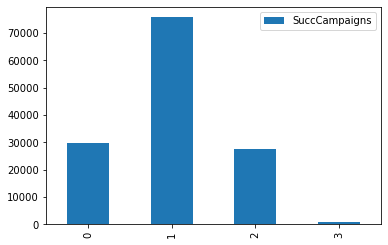

In [108]:
dfGS.plot(kind='bar')

In [109]:
dfGS1 = dfGS.set_index('Group')
dfGS1

,SuccCampaigns
Group,
1,29847
2,75776
3,27598
4,735


In [110]:
dfG1

,Campaigns,TPctg
Group,,
1,60891,16.080908
2,193347,51.061655
3,111732,29.507677
4,12684,3.349760


In [111]:
GS_ratio = dfG1.join(dfGS1)
GS_ratio

,Campaigns,TPctg,SuccCampaigns
Group,,,
1,60891,16.080908,29847
2,193347,51.061655,75776
3,111732,29.507677,27598
4,12684,3.349760,735


#### Let's check out the success ratio between Successful Campaigns vs the qty of Campaigns within the segmented Goal Group

In [112]:
GS_ratio['ratio'] = GS_ratio['SuccCampaigns']/GS_ratio['Campaigns']
GS_ratio

,Campaigns,TPctg,SuccCampaigns,ratio
Group,,,,
1,60891,16.080908,29847,0.490171
2,193347,51.061655,75776,0.391917
3,111732,29.507677,27598,0.247002
4,12684,3.349760,735,0.057947


<AxesSubplot:xlabel='Group'>

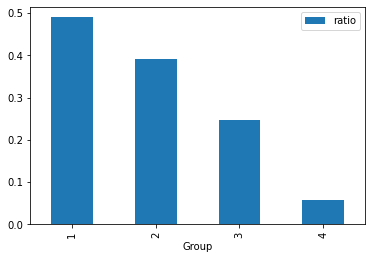

In [113]:
GS_ratio.reset_index().plot(x='Group', y='ratio', kind = 'bar')

<AxesSubplot:xlabel='Group'>

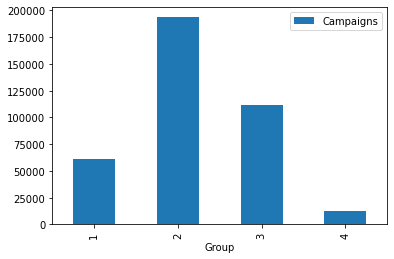

In [114]:
GS_ratio.reset_index().plot(x='Group', y='Campaigns', kind = 'bar')

In [115]:
GS_ratio2 = GS_ratio
#df.to_numpy(GS_ratio2)
GS_ratio2

,Campaigns,TPctg,SuccCampaigns,ratio
Group,,,,
1,60891,16.080908,29847,0.490171
2,193347,51.061655,75776,0.391917
3,111732,29.507677,27598,0.247002
4,12684,3.349760,735,0.057947


In [116]:
GS_ratio2 = GS_ratio2.reset_index()
GS_ratio2
#plot(x='Group', y='Campaigns', kind = 'pie', label = "GS_ratio")

,Group,Campaigns,TPctg,SuccCampaigns,ratio
0,1,60891,16.080908,29847,0.490171
1,2,193347,51.061655,75776,0.391917
2,3,111732,29.507677,27598,0.247002
3,4,12684,3.349760,735,0.057947


Text(0.5, 1.08, 'Successful Campaigns')

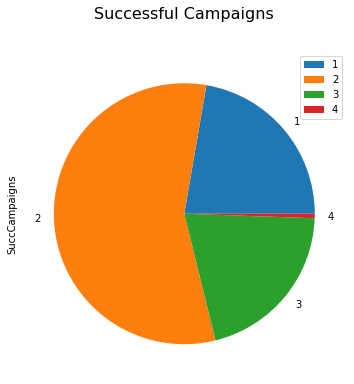

In [117]:
GS_ratio.plot.pie(y = 'SuccCampaigns', figsize = (6,6))
plt.title('Successful Campaigns', fontsize = 16, y=1.08)

Text(0.5, 1.08, 'Ratio Successful Campaigns')

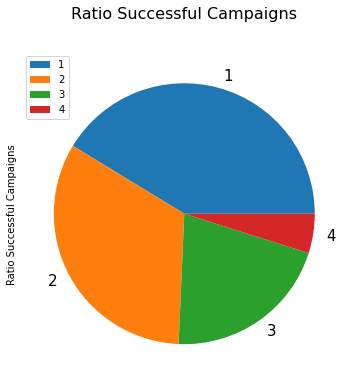

In [119]:
GS_ratio.plot.pie(y = 'ratio', figsize = (6,6), label = 'Ratio Successful Campaigns',
                        fontsize = 15)
plt.title('Ratio Successful Campaigns', fontsize = 16, y=1.08)

### a. Distribution of (goal- raised amount)

In [121]:
df >> dfply.arrange('usd_goal_real')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
304489,620302213,LOVELAND Round 6: A Force More Powerful,Conceptual Art,Art,USD,2009-12-04,1.000000e-02,2009-11-25 07:54:49,100.0,successful,6,US,100.00,100.00,1.000000e-02,8-22
317771,688564643,"Word-of-mouth publishing: get ""Corruptions"" ou...",Fiction,Publishing,USD,2011-12-13,1.000000e-02,2011-11-07 16:46:52,0.0,canceled,0,US,0.00,0.00,1.000000e-02,23-37
370401,9572984,Nana,Shorts,Film & Video,USD,2012-03-16,1.500000e-01,2012-01-25 07:23:19,0.0,failed,0,US,0.00,0.00,1.500000e-01,38-52
74446,1379346088,Bug's Big Adventure: Mexico Edition,Art,Art,MXN,2016-11-12,1.000000e+01,2016-11-11 16:30:00,335.0,successful,7,MX,18.05,16.41,4.900000e-01,0-7
226171,219760504,RocknRoll NoisePollution,Documentary,Film & Video,USD,2011-07-19,5.000000e-01,2011-07-12 15:59:39,0.0,failed,0,US,0.00,0.00,5.000000e-01,0-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226161,219702078,Kitchen from Austria in Switzerland,Restaurants,Food,CHF,2015-10-05,1.000000e+08,2015-08-06 19:12:10,0.0,failed,0,CH,0.00,0.00,1.040572e+08,53-67
222208,2132015082,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,EUR,2017-03-14,1.000000e+08,2017-01-13 20:08:41,36.0,failed,2,DE,1.06,38.65,1.073699e+08,53-67
367928,944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,EUR,2015-10-24,1.000000e+08,2015-08-25 23:52:30,2.0,failed,2,FR,2.29,2.20,1.101698e+08,53-67
196531,2000749004,A Celtic Lovestory,Drama,Film & Video,GBP,2015-11-30,1.000000e+08,2015-11-17 00:47:15,0.0,failed,0,GB,0.00,0.00,1.513959e+08,8-22


In [163]:
df_01 = df
df_01

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,diff
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,53-67,-1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,53-67,-27579.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,38-52,-44780.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,23-37,-4999.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,53-67,-18217.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,23-37,-49975.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,23-37,-1345.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,38-52,-14980.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,23-37,-14800.00


In [125]:
df_01.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration                  category
dtype: object

### Next plot, shows us:

#### Smaller goal's campaings are more likely to pledge more funds.

<AxesSubplot:xlabel='usd_goal_real'>

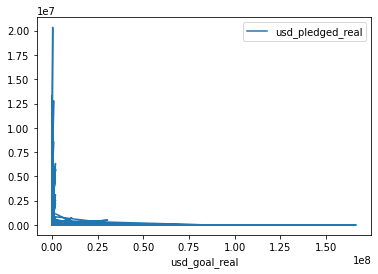

In [132]:
df_01.plot(x ='usd_goal_real',y='usd_pledged_real')
#plot(x='Group', y='Campaigns', kind = 'bar')

<AxesSubplot:xlabel='usd_pledged_real'>

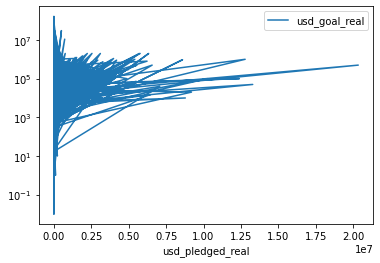

In [139]:
df_01.plot(y ='usd_goal_real',x='usd_pledged_real',logy=True)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='usd_goal_real'>

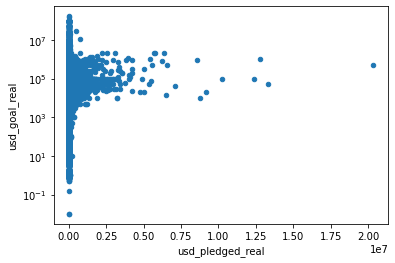

In [143]:
df_01.plot(y ='usd_goal_real',x='usd_pledged_real',logy=True, kind = 'scatter')

Text(0.5, 1.08, 'Goal vs diff')

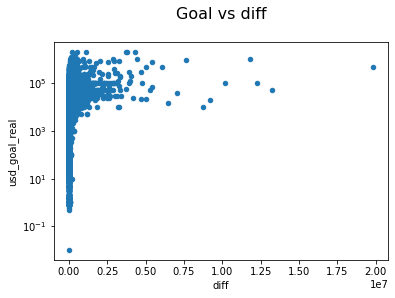

In [169]:
df_01_s = df_01 >> dfply.filter_by(df.state == 'successful') 
df_01_s
df_01_s.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal vs diff', fontsize = 16, y=1.08)

In [152]:
df1gs['diff']=df1gs['usd_pledged_real']-df1gs['usd_goal_real']
df2gs['diff']=df2gs['usd_pledged_real']-df2gs['usd_goal_real']
df3gs['diff']=df3gs['usd_pledged_real']-df3gs['usd_goal_real']
df4gs['diff']=df4gs['usd_pledged_real']-df4gs['usd_goal_real']

Text(0.5, 1.08, 'Goal: x <= $1,000 USD')

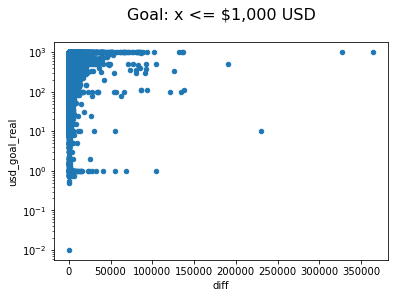

In [155]:
df1gs.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal: x <= $1,000 USD', fontsize = 16, y=1.08)

Text(0.5, 1.08, 'Goal: $1,000 < x < $10,000 USD')

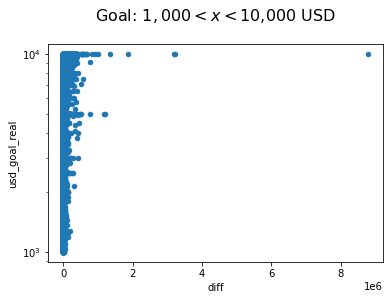

In [156]:
df2gs.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal: $1,000 < x < $10,000 USD', fontsize = 16, y=1.08)

Text(0.5, 1.08, 'Goal: $10,000 < x < $100,000 USD')

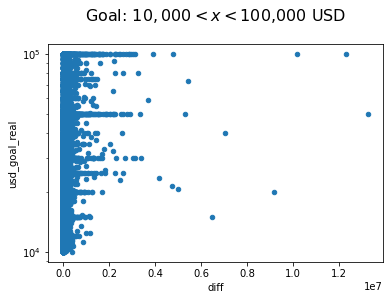

In [157]:
df3gs.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal: $10,000 < x < $100,000 USD', fontsize = 16, y=1.08)

Text(0.5, 1.08, 'Goal: $100,000 < x USD')

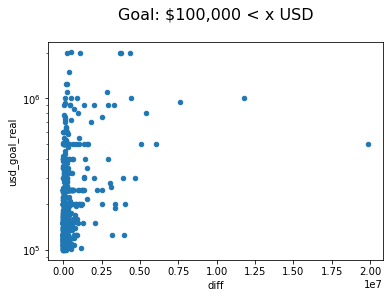

In [158]:
df4gs.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal: $100,000 < x USD', fontsize = 16, y=1.08)

____

# RESULTS

## 1. Does the campaign length impact the success rate?

#### Most succesful ratio Range of lenght is 8-22 days, while the worst succesfull ratio is the group of 53-67 days

In [177]:
ds_ratio >> dfply.arrange('SuccessRatio')

,TCampaigns,Pctg,SuccessCampaigns,SuccessRatio
53-67,41779,11.033556,8685,0.207880
83-92,2917,0.770360,839,0.287624
38-52,48145,12.714774,16296,0.338478
23-37,243408,64.282432,87784,0.360646
68-82,1020,0.269375,404,0.396078
0-7,3308,0.873621,1389,0.419891
8-22,38077,10.055882,18559,0.487407


Text(0.5, 1.08, 'Success Ratio')

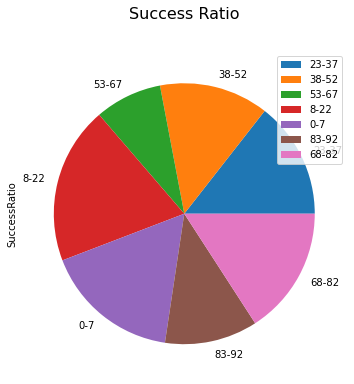

In [178]:
ds_ratio.plot.pie(y = 'SuccessRatio', figsize = (6,6))
plt.title('Success Ratio', fontsize = 16, y=1.08)

## 2. What is the relationship between the goal and the success of the campaign?

### Goal Ranges are:

#### Group 1: x <= 1,000 USD

#### Group 2: 1,000 < x <= 10,000 USD

#### Group 3: 10,000 < x <= 100,000 USD

#### Group 4: 100,000 < x  USD

### Group 2 of goal has the most successful ratio with nearly 50%. The worst successful ratio is on Group 4 with 5% on success.

In [182]:
GS_ratio >> dfply.arrange('ratio')

,Campaigns,TPctg,SuccCampaigns,ratio
Group,,,,
4,12684,3.349760,735,0.057947
3,111732,29.507677,27598,0.247002
2,193347,51.061655,75776,0.391917
1,60891,16.080908,29847,0.490171


Text(0.5, 1.08, 'Goal Ratio Success Groups')

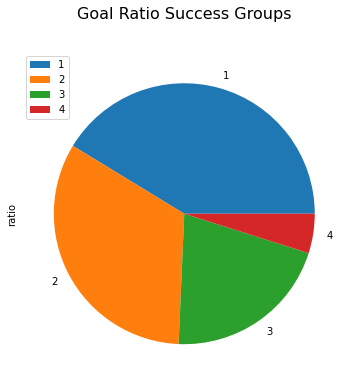

In [183]:
GS_ratio.plot.pie(y = 'ratio', figsize = (6,6))
plt.title('Goal Ratio Success Groups', fontsize = 16, y=1.08)

###  a. Distribution of (goal - raised amount)

#### This plot shows the difference between the Goal and the Pledged amount. Plotting the difference on the X axis and the Goal requested on the Y axis.

#### Proyects with bigger goal requests tend to raise more funds than smaller ones.

Text(0.5, 1.08, 'Goal vs diff')

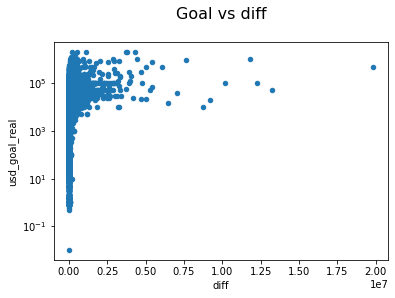

In [185]:
df_01_s = df_01 >> dfply.filter_by(df.state == 'successful') 
df_01_s
df_01_s.plot(y ='usd_goal_real',x='diff',logy=True, kind = 'scatter')
plt.title('Goal vs diff', fontsize = 16, y=1.08)